In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("survey_results.csv")

In [3]:
df.shape

(30010, 17)

# Checking  dropping duplicate value

In [4]:
df.duplicated().sum()

10

In [5]:
 df = df.drop_duplicates()

In [6]:
df.shape

(30000, 17)

# Outlier Removal

In [7]:
df.describe()

,age
count,30000.000000
mean,33.048167
std,13.438904
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


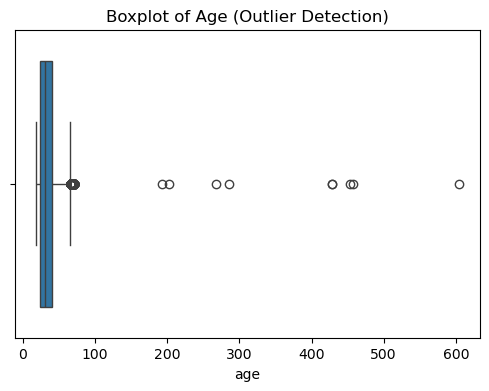

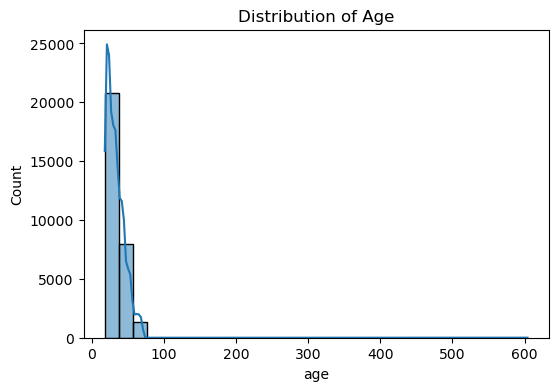

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Age (outliers will show as dots beyond whiskers)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["age"])
plt.title("Boxplot of Age (Outlier Detection)")
plt.show()

# Histogram / KDE plot to see distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()


In [9]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
lower_range,upper_range

(-2.5, 65.5)

In [10]:
df[df["age"] > upper_range]["age"].max()

604

In [11]:
df = df[df["age"] <= 100]

In [12]:
df.shape

(29991, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   29991 non-null  object
 1   age                             29991 non-null  int64 
 2   gender                          29991 non-null  object
 3   zone                            29991 non-null  object
 4   occupation                      29991 non-null  object
 5   income_levels                   29991 non-null  object
 6   consume_frequency(weekly)       29983 non-null  object
 7   current_brand                   29991 non-null  object
 8   preferable_consumption_size     29991 non-null  object
 9   awareness_of_other_brands       29991 non-null  object
 10  reasons_for_choosing_brands     29991 non-null  object
 11  flavor_preference               29991 non-null  object
 12  purchase_channel                29981 non-null

# Exploring gender Column

In [14]:
df["gender"].value_counts()

M    16133
F    13858
Name: gender, dtype: int64

In [15]:
print(df['gender'].isnull().sum())

0


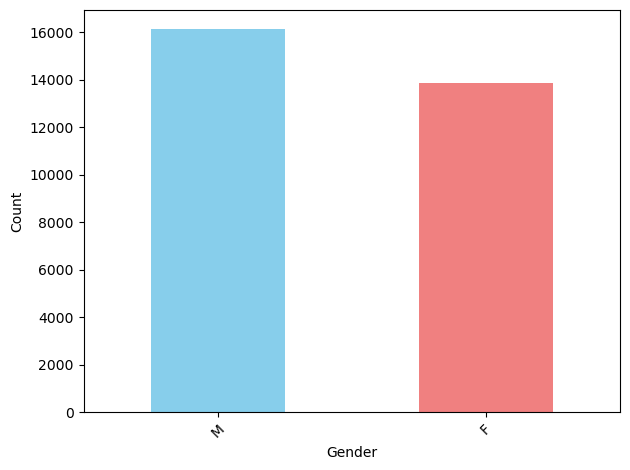

In [16]:
df['gender'].value_counts().plot(kind='bar',color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exploring Zone column

In [17]:
df["zone"].value_counts()

Metro         11906
Urban         10686
Semi-Urban     5274
Rural          2116
urbna             5
Metor             4
Name: zone, dtype: int64

In [18]:
print(df['zone'].isnull().sum())

0


In [19]:
df["zone"] = df["zone"].replace({"urbna":"Urban","Metor":"Metro"})

In [20]:
df["zone"].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

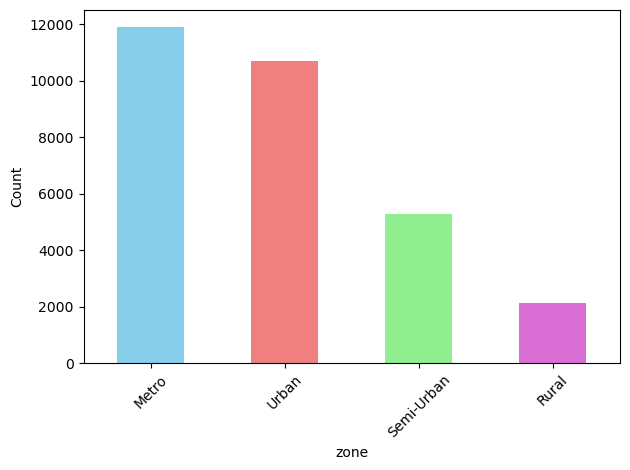

In [21]:
df["zone"].value_counts().plot(kind='bar',color=['skyblue', 'lightcoral','lightgreen','orchid'])
plt.xlabel('zone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exploring Occupation Column

In [22]:
df["occupation"].value_counts()

Working Professional    15801
Student                  8060
Entrepreneur             5000
Retired                  1130
Name: occupation, dtype: int64

In [23]:
print(df['occupation'].isnull().sum())

0


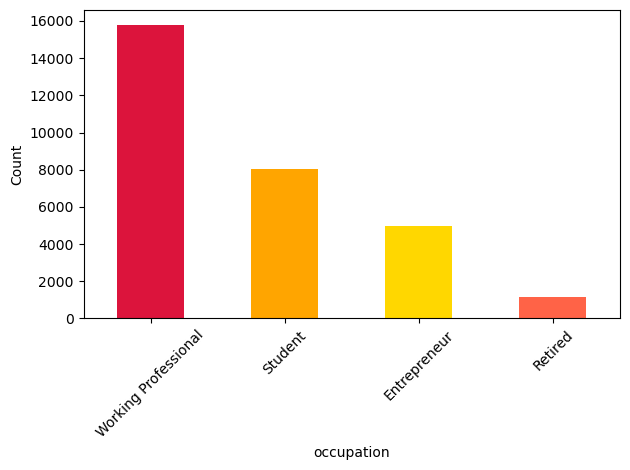

In [24]:
df["occupation"].value_counts().plot(kind='bar',color=['crimson', 'orange', 'gold', 'tomato'])
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exploring Income Level Column

In [25]:
df["income_levels"].value_counts()

None         8060
16L - 25L    5897
10L - 15L    5251
<10L         4661
26L - 35L    3872
> 35L        2250
Name: income_levels, dtype: int64

In [26]:
print(df['income_levels'].isnull().sum())

0


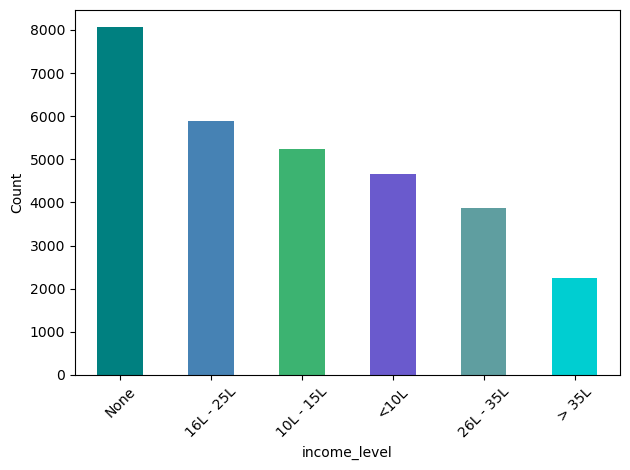

In [27]:
df["income_levels"].value_counts().plot(kind='bar',color=['teal', 'steelblue', 'mediumseagreen', 'slateblue', 'cadetblue', 'darkturquoise'])
plt.xlabel('income_level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with  "Consume_frequecy" Column

In [28]:
df["consume_frequency(weekly)"].unique()

array(['3-4 times', '5-7 times', '0-2 times', nan], dtype=object)

In [29]:
df["consume_frequency(weekly)"].isnull().sum()

8

In [30]:
df["consume_frequency(weekly)"].mode()

0    3-4 times
Name: consume_frequency(weekly), dtype: object

In [31]:
df["consume_frequency(weekly)"] = df["consume_frequency(weekly)"].fillna(
    df["consume_frequency(weekly)"].mode()[0]
)
df["consume_frequency(weekly)"].isnull().sum()

0

In [32]:
df["consume_frequency(weekly)"].value_counts()

3-4 times    11794
5-7 times     9774
0-2 times     8423
Name: consume_frequency(weekly), dtype: int64

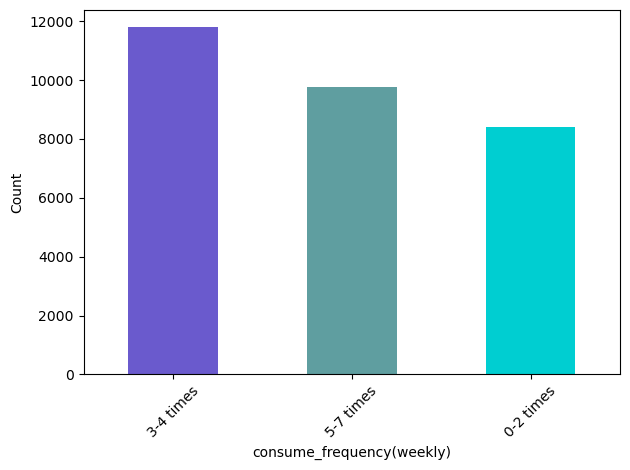

In [33]:
df["consume_frequency(weekly)"].value_counts().plot(kind='bar',color=['slateblue', 'cadetblue', 'darkturquoise'])
plt.xlabel("consume_frequency(weekly)")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with current_brand column

In [34]:
df["current_brand"].unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [35]:
df["current_brand"].isnull().sum()

0

In [36]:
df["current_brand"].value_counts()

Established    15442
Newcomer       14499
newcomer          30
Establishd        20
Name: current_brand, dtype: int64

In [37]:
df["current_brand"] = df["current_brand"].replace({'newcomer':'Newcomer',"Establishd":"Established "})

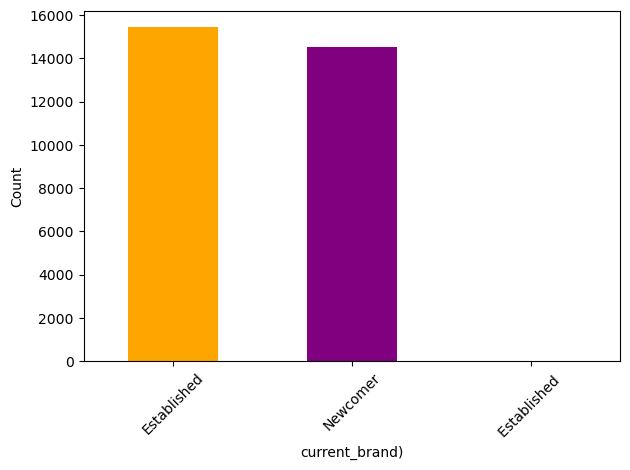

In [38]:
df["current_brand"].value_counts().plot(kind='bar',color=['orange', 'purple', 'yellow'])
plt.xlabel("current_brand)")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with preferable_consumption_size

In [39]:
df["preferable_consumption_size"].unique()

array(['Medium (500 ml)', 'Large (1 L)', 'Small (250 ml)'], dtype=object)

In [40]:
df["preferable_consumption_size"].isnull().sum()

0

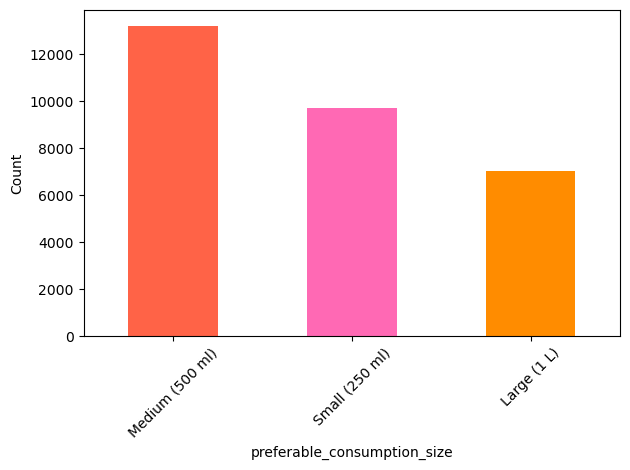

In [41]:
df["preferable_consumption_size"].value_counts().plot(kind='bar',color=['tomato', 'hotpink', 'darkorange'])
plt.xlabel("preferable_consumption_size")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing "awareness_of_other_brands" column 

In [42]:
df["awareness_of_other_brands"].unique()

array(['0 to 1', '2 to 4', 'above 4'], dtype=object)

In [43]:
df["awareness_of_other_brands"].value_counts()

0 to 1     12966
2 to 4     11225
above 4     5800
Name: awareness_of_other_brands, dtype: int64

In [44]:
df["awareness_of_other_brands"].isnull().sum()

0

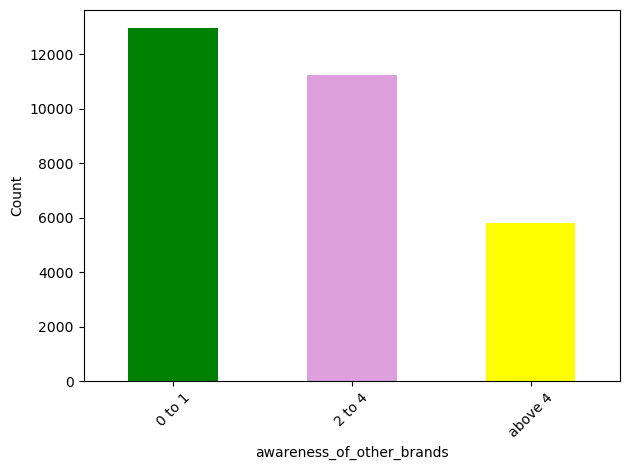

In [45]:
df["awareness_of_other_brands"].value_counts().plot(kind='bar',color=['green', 'plum', 'yellow'])
plt.xlabel("awareness_of_other_brands")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with "reasons_for_choosing_brands " column

In [46]:
df["reasons_for_choosing_brands"].unique()

array(['Price', 'Quality', 'Availability', 'Brand Reputation'],
      dtype=object)

In [47]:
df["reasons_for_choosing_brands"].isnull().sum()

0

In [48]:
df["reasons_for_choosing_brands"].value_counts()

Price               14138
Availability         6590
Brand Reputation     4661
Quality              4602
Name: reasons_for_choosing_brands, dtype: int64

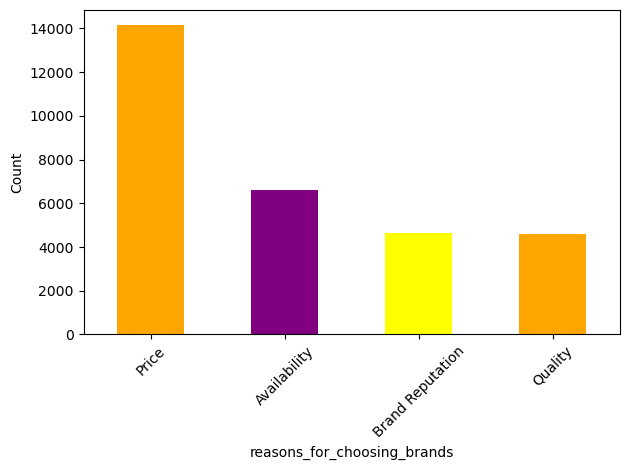

In [49]:
df["reasons_for_choosing_brands"].value_counts().plot(kind='bar',color=['orange', 'purple', 'yellow'])
plt.xlabel("reasons_for_choosing_brands")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with "flavor_preference" column

In [50]:
df["flavor_preference"].unique()

array(['Traditional', 'Exotic'], dtype=object)

In [51]:
df["reasons_for_choosing_brands"].isnull().sum()

0

In [52]:
df["flavor_preference"].value_counts()

Traditional    15103
Exotic         14888
Name: flavor_preference, dtype: int64

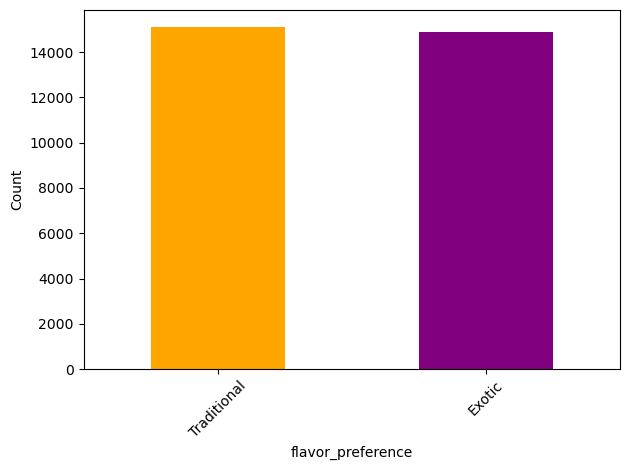

In [53]:
df["flavor_preference"].value_counts().plot(kind='bar',color=['orange', 'purple'])
plt.xlabel("flavor_preference")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with purchase_channel columns

In [54]:
df["purchase_channel"].unique()

array(['Online', 'Retail Store', nan], dtype=object)

In [55]:
df["purchase_channel"].isnull().sum()

10

In [56]:
df["purchase_channel"].mode()

0    Online
Name: purchase_channel, dtype: object

In [57]:
df["purchase_channel"] = df["purchase_channel"].fillna(df["purchase_channel"].mode()[0])

In [58]:
df["purchase_channel"].isnull().sum()

0

In [59]:
df["purchase_channel"].value_counts()

Online          16572
Retail Store    13419
Name: purchase_channel, dtype: int64

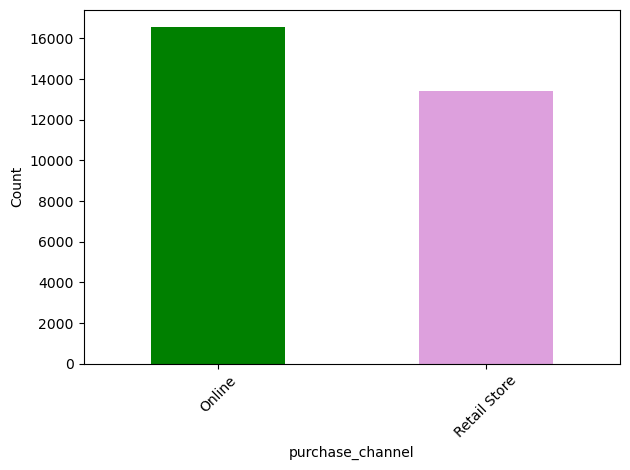

In [60]:
df["purchase_channel"].value_counts().plot(kind='bar',color=['green', 'plum'])
plt.xlabel("purchase_channel")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with packaging_preference

In [61]:
df["packaging_preference"].unique()

array(['Simple', 'Premium', 'Eco-Friendly'], dtype=object)

In [62]:
df["packaging_preference"].isnull().sum()

0

In [63]:
df["packaging_preference"].value_counts()

Simple          14446
Premium         11699
Eco-Friendly     3846
Name: packaging_preference, dtype: int64

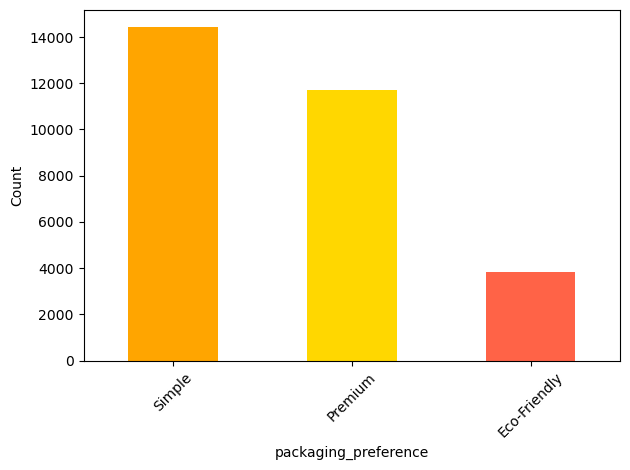

In [64]:
df["packaging_preference"].value_counts().plot(kind='bar',color=['orange', 'gold', 'tomato'])
plt.xlabel("packaging_preference")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with health_concerns column

In [65]:
df["health_concerns"].unique()

array(['Medium (Moderately health-conscious)', 'Low (Not very concerned)',
       'High (Very health-conscious)'], dtype=object)

In [66]:
df["health_concerns"].isnull().sum()

0

In [67]:
df["health_concerns"].value_counts()

High (Very health-conscious)            11915
Medium (Moderately health-conscious)    10631
Low (Not very concerned)                 7445
Name: health_concerns, dtype: int64

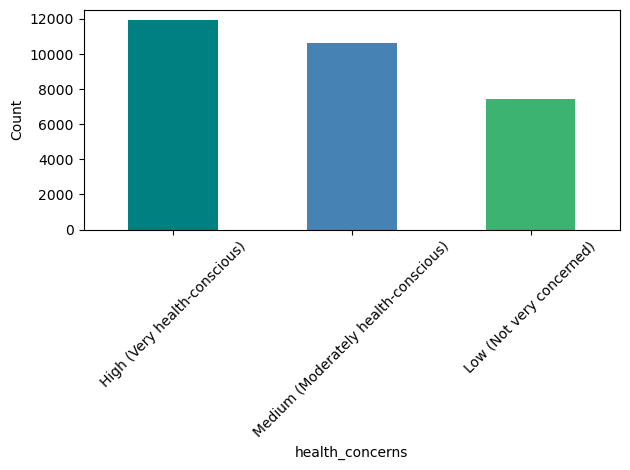

In [68]:
df["health_concerns"].value_counts().plot(kind='bar',color=['teal', 'steelblue', 'mediumseagreen'])
plt.xlabel("health_concerns")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with typical_consumption_situations

In [69]:
df["typical_consumption_situations"].unique()

array(['Active (eg. Sports, gym)', 'Social (eg. Parties)',
       'Casual (eg. At home)'], dtype=object)

In [70]:
df["typical_consumption_situations"].isnull().sum()

0

In [71]:
df["typical_consumption_situations"].value_counts()

Active (eg. Sports, gym)    11251
Casual (eg. At home)        10077
Social (eg. Parties)         8663
Name: typical_consumption_situations, dtype: int64

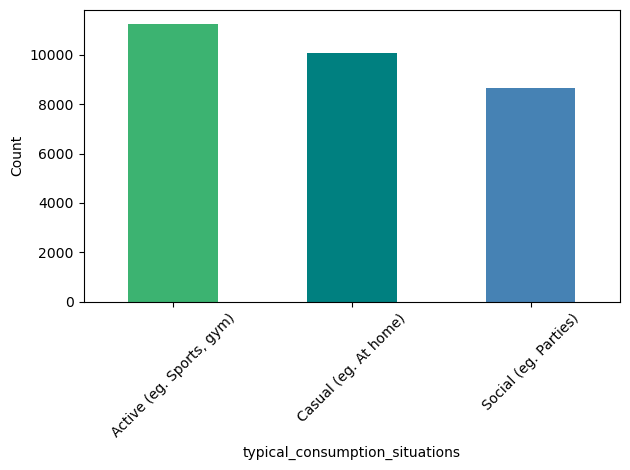

In [72]:
df["typical_consumption_situations"].value_counts().plot(kind='bar',color=['mediumseagreen','teal', 'steelblue' ])
plt.xlabel("typical_consumption_situations")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dealing with  price_range

In [73]:
df["price_range"].unique()

array(['100-150', '200-250', '150-200', '50-100'], dtype=object)

In [74]:
df["price_range"].isnull().sum()

0

In [75]:
df["price_range"].value_counts()

200-250    9714
150-200    8809
100-150    7811
50-100     3657
Name: price_range, dtype: int64

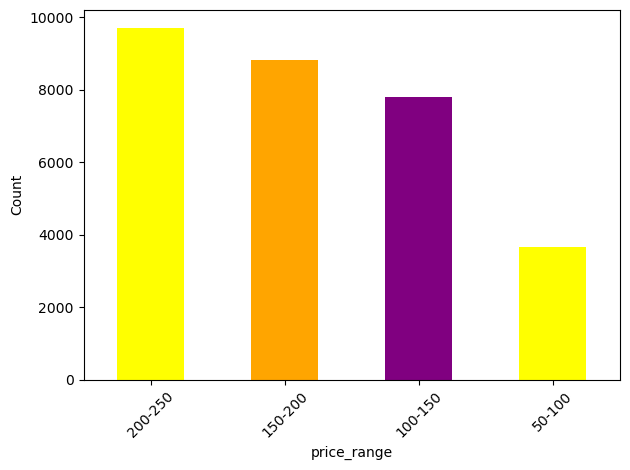

In [76]:
df["price_range"].value_counts().plot(kind='bar',color=['yellow','orange','purple'])
plt.xlabel("price_range")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Engineering

# Objective: Create a new column `age_group` by categorizing the existing `age`
column into specific age ranges.
● Categorize ages into the following groups:
○ 18-25
○ 26-35
○ 36-45
○ 46-55
○ 56-70
○ 70+
● Ensure that each age in the dataset is mapped to one of these age groups.
● After that, remove the original `age` column from the dataset.


In [77]:
df.shape

(29991, 17)

In [78]:
import numpy as np

# Define conditions
conditions = [
    (df['age'] >= 18) & (df['age'] <= 25),
    (df['age'] >= 26) & (df['age'] <= 35),
    (df['age'] >= 36) & (df['age'] <= 45),
    (df['age'] >= 46) & (df['age'] <= 55),
    (df['age'] >= 56) & (df['age'] <= 70),
    (df['age'] > 70)
]

# Define corresponding choices
choices = ["18-25", "26-35", "36-45", "46-55", "56-70", "70+"]

# Create new column
df['age_group'] = np.select(conditions, choices, default="Unknown")

# Drop the original age column
df = df.drop(columns=['age'])


In [79]:
df['age_group'].value_counts()

18-25    10468
26-35     9093
36-45     5972
46-55     2966
56-70     1492
Name: age_group, dtype: int64

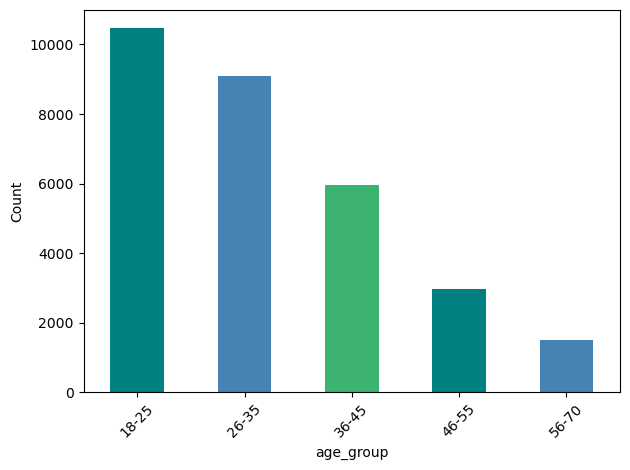

In [80]:
df['age_group'].value_counts().plot(kind='bar',color=['teal', 'steelblue', 'mediumseagreen'])
plt.xlabel('age_group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Create `cf_ab_score` (Consume Frequency and Awareness Brand
Score)
Objective: Create a new column `cf_ab_score` by combining the information from
`consume_frequency(weekly)` and `awareness_of_other_brands` columns.
● Use the following mappings for consume_frequency(weekly):
○ "0-2 times" → 1
○ "3-4 times" → 2
○ "5-7 times" → 3
● Use the following mappings for awareness_of_other_brands:
○ "0 to 1" → 1
○ "2 to 4" → 2
codebasics.io
○ "above 4" → 3
● Calculate cf_ab_score using the following formula:
● Round the result to two decimal places.

In [81]:
import numpy as np

# Step 1: Map values for consume_frequency(weekly)
freq_map = {
    "0-2 times": 1,
    "3-4 times": 2,
    "5-7 times": 3
}

df['frequency_score'] = df['consume_frequency(weekly)'].map(freq_map)

# Step 2: Map values for awareness_of_other_brands
awareness_map = {
    "0 to 1": 1,
    "2 to 4": 2,
    "above 4": 3
}

df['awareness_score'] = df['awareness_of_other_brands'].map(awareness_map)

# Step 3: Calculate cf_ab_score
df['cf_ab_score'] = df['frequency_score'] / (df['awareness_score'] + df['frequency_score'])

# Step 4: Round to two decimal places
df['cf_ab_score'] = df['cf_ab_score'].round(2)

# (Optional) Drop helper columns if not needed
df = df.drop(columns=['frequency_score', 'awareness_score'])


In [82]:
df["cf_ab_score"].max()

0.75

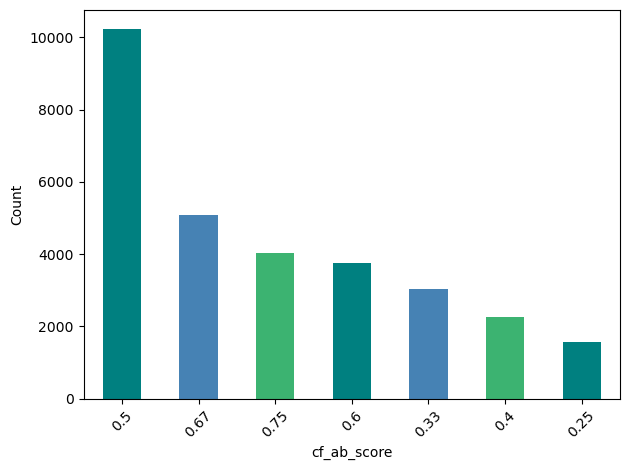

In [83]:
df['cf_ab_score'].value_counts().plot(kind='bar',color=['teal', 'steelblue', 'mediumseagreen'])
plt.xlabel('cf_ab_score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 3: Create Zone Affluence Score (ZAS)
Objective: Calculate the `zas_score` using a combination of the `zone` and
`income_levels` columns.
● Use the following mappings for the zone column:
○ "Urban" → 3
○ "Metro" → 4
○ "Rural" → 1
○ "Semi-Urban" → 2
● Use the following mappings for the income_levels column:
○ "<10L" → 1
○ "10L - 15L" → 2
○ "16L - 25L" → 3
○ "26L - 35L" → 4
○ "> 35L" → 5
○ "Not Reported" → 0
● Calculate the zas_score using the following formula:

In [84]:
# Step 1: Map zone values
zone_map = {
    "Urban": 3,
    "Metro": 4,
    "Rural": 1,
    "Semi-Urban": 2
}
df['zone_score'] = df['zone'].map(zone_map)

# Step 2: Map income_levels values (fixed mapping)
income_map = {
    "<10L": 1,
    "10L - 15L": 2,
    "16L - 25L": 3,
    "26L - 35L": 4,
    "> 35L": 5,
    "Not Reported": 0,
    "None": 0
}
df['income_score'] = df['income_levels'].map(income_map)

# Step 3: Calculate ZAS Score
df['zas_score'] = df['zone_score'] * df['income_score']

# (Optional) Drop helper columns if not needed
df = df.drop(columns=['zone_score', 'income_score'])


In [85]:
df['zas_score'].value_counts()

0     8060
12    3671
4     3082
6     2991
8     2739
3     2085
9     2041
16    1508
2     1257
20     921
15     807
10     379
1      307
5      143
Name: zas_score, dtype: int64

In [86]:
# Count unique values in zas_score
unique_zas_count = df['zas_score'].nunique()

print("Number of unique ZAS values:", unique_zas_count)


Number of unique ZAS values: 14


In [87]:
# Get the unique ZAS values
unique_zas_values = sorted(df['zas_score'].unique())

# Count them
unique_zas_count = len(unique_zas_values)

print("Unique ZAS values:", unique_zas_values)
print("Total unique ZAS values:", unique_zas_count)


Unique ZAS values: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 20]
Total unique ZAS values: 14


In [88]:
df['current_brand'].value_counts()
df['current_brand'] = df['current_brand'].replace({"Establishd":"Established"})
df['current_brand'].value_counts()

Established     15442
Newcomer        14529
Established        20
Name: current_brand, dtype: int64

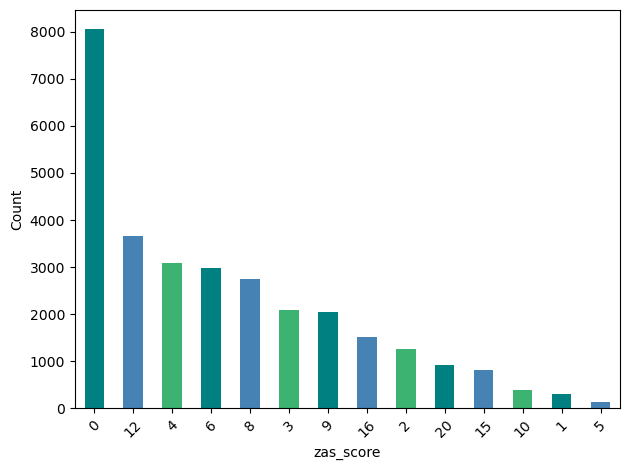

In [89]:
df['zas_score'].value_counts().plot(kind='bar',color=['teal', 'steelblue', 'mediumseagreen'])
plt.xlabel('zas_score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Brand Switching Indicator (BSI)
Objective: Create a binary indicator column `bsi` that identifies if a respondent is
likely to switch brands.
codebasics.io
● Check if the respondent’s current_brand is not "Established".
● Also check if the reasons_for_choosing_brands are either "Price" or
"Quality".
● If both conditions are true, assign a value of 1 to indicate potential for brand
switching. Otherwise, assign 0.

In [90]:
# Step 4: Brand Switching Indicator (BSI)

df['bsi'] = (
    ((df['current_brand'].str.strip().str.lower() != "established") &
     (df['reasons_for_choosing_brands'].str.strip().str.lower().isin(["price", "quality"])))
    .astype(int)
)


In [91]:
df['bsi'].value_counts()

0    20816
1     9175
Name: bsi, dtype: int64

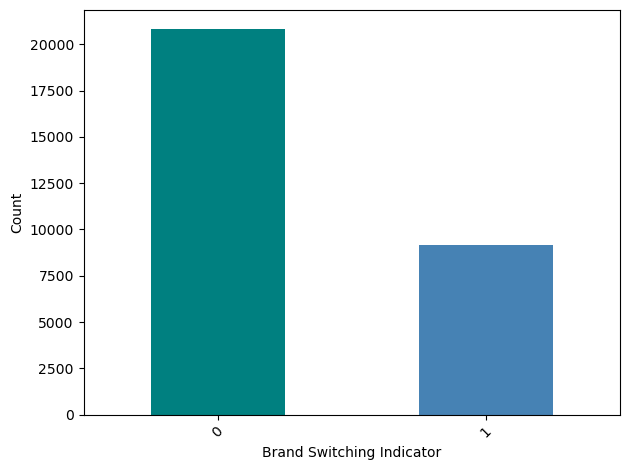

In [92]:
df['bsi'].value_counts().plot(kind='bar',color=['teal', 'steelblue', 'mediumseagreen'])
plt.xlabel('Brand Switching Indicator')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Final Cleaning Step:
Removing Logical Outliers:
● When reviewing the occupation data, we found logical inconsistencies. For
instance, there are students listed in the `56-70` age group, which seems like an
incorrect entry. We need to remove such records where the data doesn't make
sense logically.


In [93]:
df['age_group'].unique()

array(['26-35', '46-55', '36-45', '18-25', '56-70'], dtype=object)

In [94]:
# Step 1: Define invalid occupation-age combinations
invalid_conditions = (
    ((df['occupation'] == "Student") & (df['age_group'].isin(["36-45","46-55", "56-70"]))) |
    ((df['occupation'] == "Retired") & (df['age_group'].isin(["18-25", "26-35","36-45"])))
)

# Step 2: Remove invalid rows
df_cleaned = df[~invalid_conditions].copy()

# Step 3: Count rows after cleaning
print("Remaining rows:", df_cleaned.shape[0])


Remaining rows: 29956


In [95]:
df_cleaned.shape

(29956, 20)

In [96]:
df.shape

(29991, 20)

In [97]:
df[["age_group","occupation"]].value_counts()

age_group  occupation          
18-25      Student                 7328
26-35      Working Professional    6570
36-45      Working Professional    4353
18-25      Working Professional    2605
46-55      Working Professional    2167
26-35      Entrepreneur            1826
36-45      Entrepreneur            1619
56-70      Retired                 1130
46-55      Entrepreneur             799
26-35      Student                  697
18-25      Entrepreneur             535
56-70      Entrepreneur             221
           Working Professional     106
           Student                   35
dtype: int64

In [98]:
df_cleaned

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,Metro,Student,None,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30005,R29996,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200,26-35,0.50,12,0
30006,R29997,F,Urban,Working Professional,> 35L,3-4 times,Established,Small (250 ml),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250,36-45,0.50,15,0
30007,R29998,F,Metro,Retired,<10L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),150-200,56-70,0.50,4,0
30008,R29999,M,Urban,Working Professional,16L - 25L,5-7 times,Established,Small (250 ml),above 4,Quality,Exotic,Online,Eco-Friendly,Medium (Moderately health-conscious),Social (eg. Parties),150-200,18-25,0.50,9,0


In [99]:
df_cleaned.duplicated().sum()

0

In [100]:
df_cleaned["bsi"].value_counts()

0    20796
1     9160
Name: bsi, dtype: int64

# Spliting The Dataset

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
df_cleaned.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi'],
      dtype='object')

In [103]:
X = df_cleaned[['gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi']]
y = df_cleaned["price_range"]

In [104]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Feature Encoding

In [105]:
X_train["age_group"].unique()

array(['18-25', '26-35', '36-45', '56-70', '46-55'], dtype=object)

In [106]:
X_train["income_levels"].unique()

array(['10L - 15L', '16L - 25L', 'None', '<10L', '> 35L', '26L - 35L'],
      dtype=object)

In [107]:
X_train["health_concerns"].unique()

array(['Low (Not very concerned)', 'Medium (Moderately health-conscious)',
       'High (Very health-conscious)'], dtype=object)

In [108]:
X_train["consume_frequency(weekly)"].unique()

array(['0-2 times', '5-7 times', '3-4 times'], dtype=object)

In [109]:
X_train['preferable_consumption_size'].unique()

array(['Small (250 ml)', 'Medium (500 ml)', 'Large (1 L)'], dtype=object)

In [110]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder instance
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['age_group', 'income_levels', 'health_concerns', 
                      'consume_frequency(weekly)', 'preferable_consumption_size']

# Apply label encoding to each categorical column
for column in categorical_columns:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    
print("Label encoding completed!")
print("\nUpdated training data:")
print(X_train.head())

Label encoding completed!

Updated training data:
      gender        zone            occupation  income_levels  \
8391       F  Semi-Urban  Working Professional              0   
26395      F       Urban  Working Professional              1   
11276      F       Urban               Student              5   
9110       M       Metro  Working Professional              1   
3373       M       Metro          Entrepreneur              1   

       consume_frequency(weekly) current_brand  preferable_consumption_size  \
8391                           0      Newcomer                            2   
26395                          2   Established                            1   
11276                          1      Newcomer                            2   
9110                           1   Established                            0   
3373                           0   Established                            0   

      awareness_of_other_brands reasons_for_choosing_brands flavor_preference  \
839

In [111]:
X_train.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
8391,F,Semi-Urban,Working Professional,0,0,Newcomer,2,above 4,Availability,Traditional,Online,Simple,1,Social (eg. Parties),0,0.25,4,0
26395,F,Urban,Working Professional,1,2,Established,1,2 to 4,Quality,Traditional,Online,Premium,2,Social (eg. Parties),0,0.60,9,0
11276,F,Urban,Student,5,1,Newcomer,2,2 to 4,Price,Traditional,Online,Simple,2,"Active (eg. Sports, gym)",0,0.50,0,1
9110,M,Metro,Working Professional,1,1,Established,0,2 to 4,Quality,Traditional,Online,Premium,1,"Active (eg. Sports, gym)",1,0.50,12,0
3373,M,Metro,Entrepreneur,1,0,Established,0,above 4,Brand Reputation,Traditional,Online,Eco-Friendly,2,Casual (eg. At home),1,0.25,12,0


In [112]:
# Create label encoder for target variable
target_encoder = LabelEncoder()

# Apply label encoding to target variable
y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

print("Target variable label encoding completed!")
print(f"Original y_train shape: {y_train.shape}")
print(f"Encoded y_train shape: {y_train_encoded.shape}")

# Check the mapping
print(f"\nLabel mapping:")
for i, label in enumerate(target_encoder.classes_):
    print(f"{label} -> {i}")

# Check first few values
print(f"\nFirst 10 original y_train values: {y_train[:10]}")
print(f"First 10 encoded y_train values: {y_train_encoded[:10]}")

Target variable label encoding completed!
Original y_train shape: (22467,)
Encoded y_train shape: (22467,)

Label mapping:
100-150 -> 0
150-200 -> 1
200-250 -> 2
50-100 -> 3

First 10 original y_train values: 8391      50-100
26395    200-250
11276    100-150
9110     150-200
3373     150-200
20186     50-100
458      200-250
15993    200-250
5211     100-150
9645     150-200
Name: price_range, dtype: object
First 10 encoded y_train values: [3 2 0 1 1 3 2 2 0 1]


In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22467 entries, 8391 to 23691
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          22467 non-null  object 
 1   zone                            22467 non-null  object 
 2   occupation                      22467 non-null  object 
 3   income_levels                   22467 non-null  int32  
 4   consume_frequency(weekly)       22467 non-null  int32  
 5   current_brand                   22467 non-null  object 
 6   preferable_consumption_size     22467 non-null  int32  
 7   awareness_of_other_brands       22467 non-null  object 
 8   reasons_for_choosing_brands     22467 non-null  object 
 9   flavor_preference               22467 non-null  object 
 10  purchase_channel                22467 non-null  object 
 11  packaging_preference            22467 non-null  object 
 12  health_concerns              

In [114]:
X_train.select_dtypes(["object"]).columns

Index(['gender', 'zone', 'occupation', 'current_brand',
       'awareness_of_other_brands', 'reasons_for_choosing_brands',
       'flavor_preference', 'purchase_channel', 'packaging_preference',
       'typical_consumption_situations'],
      dtype='object')

In [115]:
X_train["awareness_of_other_brands"].unique()

array(['above 4', '2 to 4', '0 to 1'], dtype=object)

In [116]:
X_train["reasons_for_choosing_brands"].unique()

array(['Availability', 'Quality', 'Price', 'Brand Reputation'],
      dtype=object)

In [117]:
X_train["flavor_preference"].unique()

array(['Traditional', 'Exotic'], dtype=object)

In [118]:
X_train["purchase_channel"].unique()

array(['Online', 'Retail Store'], dtype=object)

In [119]:
X_train["packaging_preference"].unique()

array(['Simple', 'Premium', 'Eco-Friendly'], dtype=object)

In [120]:
X_train["typical_consumption_situations"].unique()

array(['Social (eg. Parties)', 'Active (eg. Sports, gym)',
       'Casual (eg. At home)'], dtype=object)

In [121]:
import pandas as pd

# List of categorical columns
categorical_columns = ['gender', 'zone', 'occupation', 'current_brand',
                      'awareness_of_other_brands', 'reasons_for_choosing_brands',
                      'flavor_preference', 'purchase_channel', 'packaging_preference',
                      'typical_consumption_situations']

# Apply one-hot encoding using pandas
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Ensure both train and test have same columns
# Get all columns from training set
all_columns = X_train_encoded.columns

# Add missing columns to test set with 0 values
for col in all_columns:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0

# Reorder columns to match training set
X_test_encoded = X_test_encoded[all_columns]

print("One-hot encoding completed!")
print(f"Original shape: {X_train.shape}")
print(f"New shape: {X_train_encoded.shape}")
print(f"Number of features: {len(X_train_encoded.columns)}")

One-hot encoding completed!
Original shape: (22467, 18)
New shape: (22467, 28)
Number of features: 28


In [122]:
X_train_encoded.columns

Index(['income_levels', 'consume_frequency(weekly)',
       'preferable_consumption_size', 'health_concerns', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi', 'gender_M', 'zone_Rural',
       'zone_Semi-Urban', 'zone_Urban', 'occupation_Retired',
       'occupation_Student', 'occupation_Working Professional',
       'current_brand_Established ', 'current_brand_Newcomer',
       'awareness_of_other_brands_2 to 4', 'awareness_of_other_brands_above 4',
       'reasons_for_choosing_brands_Brand Reputation',
       'reasons_for_choosing_brands_Price',
       'reasons_for_choosing_brands_Quality', 'flavor_preference_Traditional',
       'purchase_channel_Retail Store', 'packaging_preference_Premium',
       'packaging_preference_Simple',
       'typical_consumption_situations_Casual (eg. At home)',
       'typical_consumption_situations_Social (eg. Parties)'],
      dtype='object')

In [123]:
y_train_encoded

array([3, 2, 0, ..., 3, 1, 3])

## Gaussian Naive Bayes Algorithm

Gaussian Naive Bayes Accuracy: 0.5618
Accuracy Percentage: 56.18%

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.27      0.35      1930
           1       0.55      0.32      0.41      2223
           2       0.66      0.87      0.76      2430
           3       0.44      0.92      0.60       906

    accuracy                           0.56      7489
   macro avg       0.53      0.60      0.53      7489
weighted avg       0.56      0.56      0.53      7489



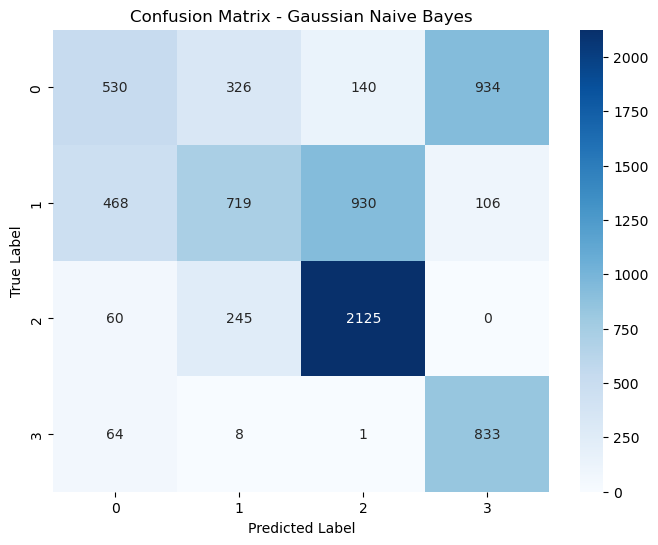

In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train model
gnb = GaussianNB()
gnb.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred = gnb.predict(X_test_encoded)

# Print results
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Gaussian Naive Bayes Accuracy: {accuracy:.4f}")
print(f"Accuracy Percentage: {accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Code for MLFLOW

In [125]:
report_dict = classification_report(y_test_encoded, y_pred,output_dict=True)
report_dict

{'0': {'precision': 0.47237076648841353,
  'recall': 0.27461139896373055,
  'f1-score': 0.3473132372214941,
  'support': 1930.0},
 '1': {'precision': 0.5539291217257319,
  'recall': 0.32343679712100765,
  'f1-score': 0.4084067026412951,
  'support': 2223.0},
 '2': {'precision': 0.6648936170212766,
  'recall': 0.8744855967078189,
  'f1-score': 0.7554212584429435,
  'support': 2430.0},
 '3': {'precision': 0.44474105712760276,
  'recall': 0.9194260485651214,
  'f1-score': 0.5994962216624685,
  'support': 906.0},
 'accuracy': 0.5617572439578048,
 'macro avg': {'precision': 0.5339836405907562,
  'recall': 0.5979899603394196,
  'f1-score': 0.5276593549920503,
  'support': 7489.0},
 'weighted avg': {'precision': 0.5557066235863601,
  'recall': 0.5617572439578048,
  'f1-score': 0.5283776048406505,
  'support': 7489.0}}

In [126]:
report_dict['0']["recall"]

0.27461139896373055

import mlflow
import mlflow.sklearn
import os

mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("GaussianNB_Experiment1")

with mlflow.start_run(run_name="Gaussian Naive Bayes Algorithm") as run:
    mlflow.log_metrics({
        "accuracy": report_dict["accuracy"],
        "recall_0": report_dict['0']["recall"],
        "recall_1": report_dict['1']["recall"],
        "recall_2": report_dict['2']["recall"],
        "recall_3": report_dict['3']["recall"],
        "macro avg recall": report_dict['macro avg']["recall"],
        "weighted avg recall": report_dict['weighted avg']["recall"],
        "precision_0": report_dict['0']["precision"],
        "precision_1": report_dict['1']["precision"],
        "precision_2": report_dict['2']["precision"],
        "precision_3": report_dict['3']["precision"],
        "macro avg precision": report_dict['macro avg']["precision"],
        "weighted avg precision": report_dict['weighted avg']["precision"],
        "f1-score_0": report_dict['0']["f1-score"],
        "f1-score_1": report_dict['1']["f1-score"],
        "f1-score_2": report_dict['2']["f1-score"],
        "f1-score_3": report_dict['3']["f1-score"],
        "macro avg f1-score": report_dict['macro avg']["f1-score"],
        "weighted avg f1-score": report_dict['weighted avg']["f1-score"]
    })

    # ✅ Instead of log_model (which is failing), save locally then log as artifact
    model_dir = "GaussianNaiveBayes_model"
    mlflow.sklearn.save_model(sk_model=gnb, path=model_dir)

    # Log the saved model directory as an artifact
    mlflow.log_artifacts(model_dir, artifact_path="model")



## Logistic Regression

Logistic Regression Accuracy: 0.8010
Accuracy Percentage: 80.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1930
           1       0.75      0.77      0.76      2223
           2       0.91      0.89      0.90      2430
           3       0.80      0.74      0.77       906

    accuracy                           0.80      7489
   macro avg       0.80      0.79      0.79      7489
weighted avg       0.80      0.80      0.80      7489


Confusion Matrix:
[[1464  298    0  168]
 [ 300 1702  221    0]
 [   0  271 2159    0]
 [ 232    0    0  674]]


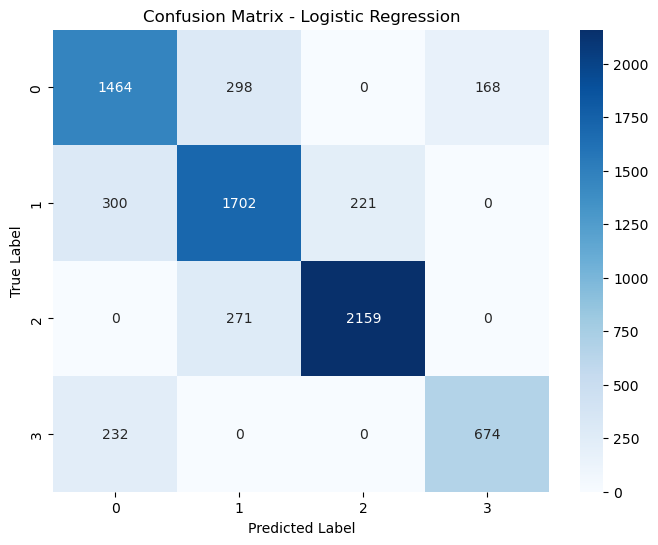

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr.fit(X_train_encoded, y_train_encoded)  # Use encoded target variable

# Make predictions
y_pred = lr.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Accuracy Percentage: {accuracy*100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [128]:
report_dict = classification_report(y_test_encoded, y_pred,output_dict=True)
report_dict

{'0': {'precision': 0.7334669338677354,
  'recall': 0.7585492227979275,
  'f1-score': 0.7457972491085074,
  'support': 1930.0},
 '1': {'precision': 0.7494495816820784,
  'recall': 0.7656320287899235,
  'f1-score': 0.757454383622608,
  'support': 2223.0},
 '2': {'precision': 0.9071428571428571,
  'recall': 0.8884773662551441,
  'f1-score': 0.8977130977130977,
  'support': 2430.0},
 '3': {'precision': 0.8004750593824228,
  'recall': 0.7439293598233996,
  'f1-score': 0.7711670480549199,
  'support': 906.0},
 'accuracy': 0.8010415275737749,
 'macro avg': {'precision': 0.7976336080187734,
  'recall': 0.7891469944165986,
  'f1-score': 0.7930329446247832,
  'support': 7489.0},
 'weighted avg': {'precision': 0.8026712710777951,
  'recall': 0.8010415275737749,
  'f1-score': 0.8016197033720206,
  'support': 7489.0}}

In [129]:
params = {"random_state":42, "max_iter":1000}

import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Logisticregression_Experiment1")

with mlflow.start_run(run_name="Logistic Regression Algorithm") as run:
    mlflow.log_metrics({
        "accuracy": report_dict["accuracy"],
        "recall_0": report_dict['0']["recall"],
        "recall_1": report_dict['1']["recall"],
        "recall_2": report_dict['2']["recall"],
        "recall_3": report_dict['3']["recall"],
        "macro avg recall": report_dict['macro avg']["recall"],
        "weighted avg recall": report_dict['weighted avg']["recall"],
        "precision_0": report_dict['0']["precision"],
        "precision_1": report_dict['1']["precision"],
        "precision_2": report_dict['2']["precision"],
        "precision_3": report_dict['3']["precision"],
        "macro avg precision": report_dict['macro avg']["precision"],
        "weighted avg precision": report_dict['weighted avg']["precision"],
        "f1-score_0": report_dict['0']["f1-score"],
        "f1-score_1": report_dict['1']["f1-score"],
        "f1-score_2": report_dict['2']["f1-score"],
        "f1-score_3": report_dict['3']["f1-score"],
        "macro avg f1-score": report_dict['macro avg']["f1-score"],
        "weighted avg f1-score": report_dict['weighted avg']["f1-score"]
    })

    # ✅ Instead of log_model (which is failing), save locally then log as artifact
    model_dir = "LogisticRegression_model"
    mlflow.sklearn.save_model(sk_model=lr, path=model_dir)

    # Log the saved model directory as an artifact
    mlflow.log_artifacts(model_dir, artifact_path="model")



# Support Vector Classifier

SVM Accuracy: 0.8619
Accuracy Percentage: 86.19%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1930
           1       0.81      0.85      0.83      2223
           2       0.93      0.91      0.92      2430
           3       0.87      0.83      0.85       906

    accuracy                           0.86      7489
   macro avg       0.86      0.86      0.86      7489
weighted avg       0.86      0.86      0.86      7489


Confusion Matrix:
[[1614  206    0  110]
 [ 167 1882  174    0]
 [   0  223 2207    0]
 [ 153    0    1  752]]


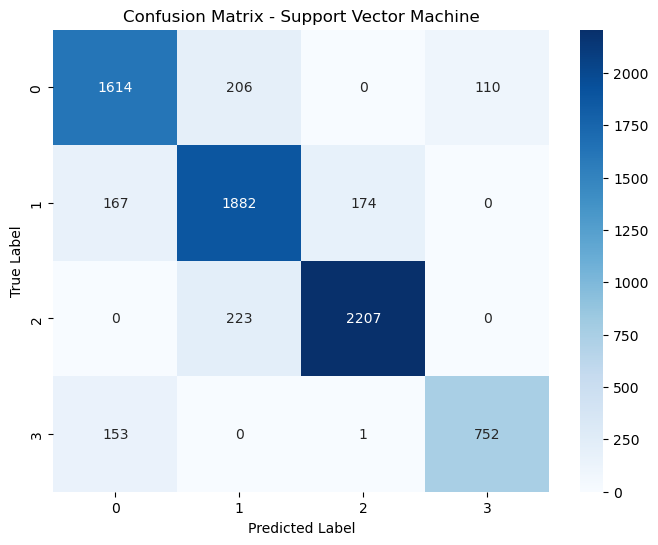

In [130]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the features (VERY important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Create SVM model
svm = SVC(kernel='rbf', random_state=42)

# Train the model
svm.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")
print(f"Accuracy Percentage: {accuracy*100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Support Vector Machine')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [131]:
report_dict = classification_report(y_test_encoded, y_pred,output_dict=True)
report_dict

{'0': {'precision': 0.8345398138572906,
  'recall': 0.8362694300518134,
  'f1-score': 0.8354037267080745,
  'support': 1930.0},
 '1': {'precision': 0.8143660752920814,
  'recall': 0.8466036887089519,
  'f1-score': 0.8301720335244817,
  'support': 2223.0},
 '2': {'precision': 0.9265323257766582,
  'recall': 0.9082304526748971,
  'f1-score': 0.9172901080631753,
  'support': 2430.0},
 '3': {'precision': 0.8723897911832946,
  'recall': 0.8300220750551877,
  'f1-score': 0.8506787330316742,
  'support': 906.0},
 'accuracy': 0.8619308318867672,
 'macro avg': {'precision': 0.8619570015273311,
  'recall': 0.8552814116227125,
  'f1-score': 0.8583861503318514,
  'support': 7489.0},
 'weighted avg': {'precision': 0.8629798809678478,
  'recall': 0.8619308318867672,
  'f1-score': 0.8622688633718414,
  'support': 7489.0}}

In [132]:
params = {"random_state": 42, "kernel": "rbf"}


mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Support Vector Classifier")

with mlflow.start_run(run_name="Support Vector Machine Algorithm") as run:
    mlflow.log_params(params)
    # Log metrics
    mlflow.log_metrics({
        "accuracy": report_dict["accuracy"],
        "recall_0": report_dict['0']["recall"],
        "recall_1": report_dict['1']["recall"],
        "recall_2": report_dict['2']["recall"],
        "recall_3": report_dict['3']["recall"],
        "macro avg recall": report_dict['macro avg']["recall"],
        "weighted avg recall": report_dict['weighted avg']["recall"],
        "precision_0": report_dict['0']["precision"],
        "precision_1": report_dict['1']["precision"],
        "precision_2": report_dict['2']["precision"],
        "precision_3": report_dict['3']["precision"],
        "macro avg precision": report_dict['macro avg']["precision"],
        "weighted avg precision": report_dict['weighted avg']["precision"],
        "f1-score_0": report_dict['0']["f1-score"],
        "f1-score_1": report_dict['1']["f1-score"],
        "f1-score_2": report_dict['2']["f1-score"],
        "f1-score_3": report_dict['3']["f1-score"],
        "macro avg f1-score": report_dict['macro avg']["f1-score"],
        "weighted avg f1-score": report_dict['weighted avg']["f1-score"]
    })

    # Save + log model
    model_dir = "SVM_model"
    mlflow.sklearn.save_model(sk_model=svm, path=model_dir)
    mlflow.log_artifacts(model_dir, artifact_path="model")

## Random Forest Classifier

Random Forest Accuracy: 0.8950
Accuracy Percentage: 89.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1930
           1       0.84      0.89      0.87      2223
           2       0.94      0.92      0.93      2430
           3       0.92      0.88      0.90       906

    accuracy                           0.90      7489
   macro avg       0.90      0.89      0.89      7489
weighted avg       0.90      0.90      0.90      7489


Confusion Matrix:
[[1670  189    0   71]
 [  95 1986  142    0]
 [   0  184 2246    0]
 [ 105    0    0  801]]


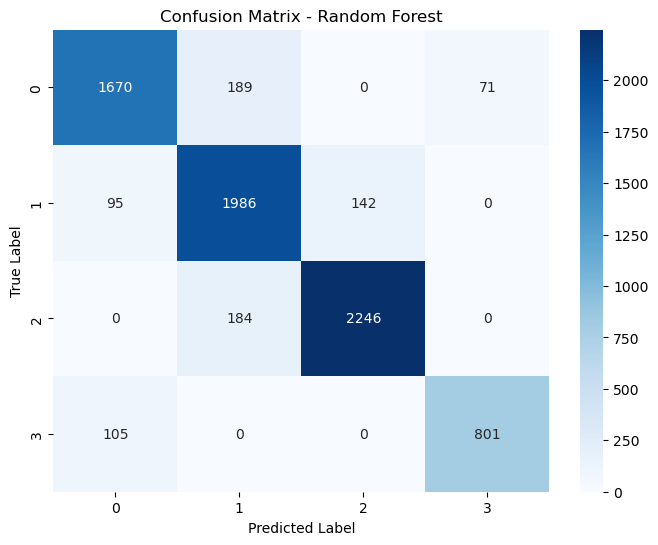

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred = rf.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Accuracy Percentage: {accuracy*100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [134]:
report = classification_report(y_test_encoded, y_pred,output_dict=True)
report

{'0': {'precision': 0.893048128342246,
  'recall': 0.8652849740932642,
  'f1-score': 0.8789473684210526,
  'support': 1930.0},
 '1': {'precision': 0.8418821534548537,
  'recall': 0.893387314439946,
  'f1-score': 0.8668703622872108,
  'support': 2223.0},
 '2': {'precision': 0.940536013400335,
  'recall': 0.9242798353909465,
  'f1-score': 0.9323370693233707,
  'support': 2430.0},
 '3': {'precision': 0.9185779816513762,
  'recall': 0.8841059602649006,
  'f1-score': 0.9010123734533183,
  'support': 906.0},
 'accuracy': 0.8950460675657631,
 'macro avg': {'precision': 0.8985110692122027,
  'recall': 0.8917645210472642,
  'f1-score': 0.894791793371238,
  'support': 7489.0},
 'weighted avg': {'precision': 0.896357468122531,
  'recall': 0.8950460675657631,
  'f1-score': 0.8953555247992521,
  'support': 7489.0}}



# ✅ Set MLflow tracking
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("RandomForest_Experiment1")

params = {"n_estimators": 100, "random_state": 42}

with mlflow.start_run(run_name="Random Forest Algorithm") as run:
    # ✅ Log metrics
    mlflow.log_metrics({
        "accuracy": accuracy,
        "recall_0": report['0']["recall"],
        "recall_1": report['1']["recall"],
        "recall_2": report['2']["recall"],
        "recall_3": report['3']["recall"],
        "macro avg recall": report['macro avg']["recall"],
        "weighted avg recall": report['weighted avg']["recall"],
        "precision_0": report['0']["precision"],
        "precision_1": report['1']["precision"],
        "precision_2": report['2']["precision"],
        "precision_3": report['3']["precision"],
        "macro avg precision": report['macro avg']["precision"],
        "weighted avg precision": report['weighted avg']["precision"],
        "f1-score_0": report['0']["f1-score"],
        "f1-score_1": report['1']["f1-score"],
        "f1-score_2": report['2']["f1-score"],
        "f1-score_3": report['3']["f1-score"],
        "macro avg f1-score": report['macro avg']["f1-score"],
        "weighted avg f1-score": report['weighted avg']["f1-score"]
    })

    # ✅ Log model params
    mlflow.log_params(params)

    # ✅ Save and log model
    model_dir = "RandomForest_model"
    mlflow.sklearn.save_model(sk_model=rf, path=model_dir)
    mlflow.log_artifacts(model_dir, artifact_path="model")

    # ✅ Save confusion matrix as artifact
    cm_path = "confusion_matrix_rf.png"
    plt.savefig(cm_path)
    mlflow.log_artifact(cm_path, artifact_path="plots")


## eXtreme Gradient Boosting

XGBoost Accuracy: 0.9226
Accuracy Percentage: 92.26%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1930
           1       0.89      0.92      0.90      2223
           2       0.96      0.95      0.95      2430
           3       0.92      0.92      0.92       906

    accuracy                           0.92      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.92      0.92      0.92      7489


Confusion Matrix:
[[1737  117    0   76]
 [  82 2035  105    1]
 [   0  125 2305    0]
 [  74    0    0  832]]


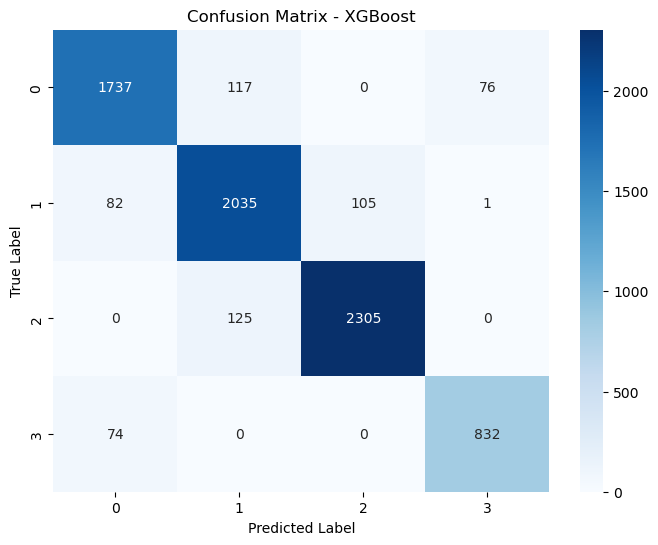

In [135]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # for multiclass
    random_state=42,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred = xgb_model.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"Accuracy Percentage: {accuracy*100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [136]:
report = classification_report(y_test_encoded, y_pred,output_dict=True)
report

{'0': {'precision': 0.9175911251980983,
  'recall': 0.9,
  'f1-score': 0.9087104368297149,
  'support': 1930.0},
 '1': {'precision': 0.893719806763285,
  'recall': 0.9154295996401259,
  'f1-score': 0.9044444444444445,
  'support': 2223.0},
 '2': {'precision': 0.9564315352697096,
  'recall': 0.948559670781893,
  'f1-score': 0.9524793388429752,
  'support': 2430.0},
 '3': {'precision': 0.9152915291529153,
  'recall': 0.9183222958057395,
  'f1-score': 0.9168044077134986,
  'support': 906.0},
 'accuracy': 0.9225530778475097,
 'macro avg': {'precision': 0.920758499096002,
  'recall': 0.9205778915569396,
  'f1-score': 0.9206096569576583,
  'support': 7489.0},
 'weighted avg': {'precision': 0.9228298515402654,
  'recall': 0.9225530778475097,
  'f1-score': 0.9226252810599824,
  'support': 7489.0}}

import mlflow
import mlflow.xgboost

# ✅ Set MLflow tracking
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("XGBoost_Experiment1")

params = {
    "objective": "multi:softprob",
    "random_state": 42,
    "eval_metric": "mlogloss"
}

with mlflow.start_run(run_name="XGBoost Algorithm") as run:
    # ✅ Log metrics
    mlflow.log_metrics({
        "accuracy": accuracy,
        "recall_0": report['0']["recall"],
        "recall_1": report['1']["recall"],
        "recall_2": report['2']["recall"],
        "recall_3": report['3']["recall"],
        "macro avg recall": report['macro avg']["recall"],
        "weighted avg recall": report['weighted avg']["recall"],
        "precision_0": report['0']["precision"],
        "precision_1": report['1']["precision"],
        "precision_2": report['2']["precision"],
        "precision_3": report['3']["precision"],
        "macro avg precision": report['macro avg']["precision"],
        "weighted avg precision": report['weighted avg']["precision"],
        "f1-score_0": report['0']["f1-score"],
        "f1-score_1": report['1']["f1-score"],
        "f1-score_2": report['2']["f1-score"],
        "f1-score_3": report['3']["f1-score"],
        "macro avg f1-score": report['macro avg']["f1-score"],
        "weighted avg f1-score": report['weighted avg']["f1-score"]
    })

    # ✅ Log params
    mlflow.log_params(params)

    # ✅ Save and log model
    model_dir = "XGBoost_model"
    mlflow.xgboost.save_model(xgb_model, model_dir)
    mlflow.log_artifacts(model_dir, artifact_path="model")

    # ✅ Save confusion matrix plot
    cm_path = "confusion_matrix_xgb.png"
    plt.savefig(cm_path)
    mlflow.log_artifact(cm_path, artifact_path="plots")


In [137]:
import pickle

In [138]:
with open ("MY_project.pkl","wb") as f:
    pickle.dump(xgb_model,f)